In [47]:
from keras.datasets import mnist

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# 1.Preprocessing

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 20s 2us/step


In [22]:
digit = X_train[12]
y_train[12]

3

(-0.5, 27.5, 27.5, -0.5)

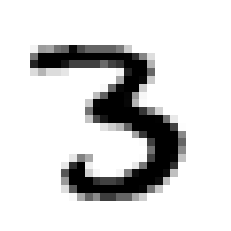

In [10]:
plt.imshow(digit, cmap=matplotlib.cm.binary)
plt.axis('off')

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test== 5)

In [18]:
nsamples, nx, ny = X_train.shape
X_train_reshaped = X_train.reshape(nsamples,nx*ny)

# 2.Training

In [23]:
sgd_clf = SGDClassifier(random_state=42)

In [43]:
sgd_clf.fit(X_train_reshaped, y_train_5)

SGDClassifier(random_state=42)

# 3.Evaluation

In [32]:
cross_val_score(sgd_clf, X_train_reshaped, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [44]:
y_train_pred = cross_val_predict(sgd_clf, X_train_reshaped, y_train_5, cv=3)

In [40]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [45]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [46]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [50]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846